In [43]:
import numpy as np
import pandas as pd
import random
import math
import re
import copy
import string
import nltk
import json
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold, GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
random.seed = 456

In [2]:
!pip install wordcloud

In [44]:
def clean_text(text):
    cleaned_text = re.sub(r'[^\w\s]', '', text).lower()
    return cleaned_text

In [3]:
def merge_json_files(file_paths: list, output_file_path: str):
    merged_data = []

    for file_path in file_paths:
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
            merged_data.extend(data if isinstance(data, list) else [data])

    with open(output_file_path, 'w', encoding='utf-8') as output_file:
        json.dump(merged_data, output_file, indent=4)

In [4]:
def is_in_specific_category(category, specific_category):
    terms = specific_category.replace("AND", "").replace("OR", "").split()
    return any(term in category for term in terms)

In [5]:
with open('tmccmldm_category.json', 'r', encoding='utf-8') as json_file:
    data_category0 = json.load(json_file)
data_category0

[{'title': 'Text mining for incoming tasks based on the urgency/importance factors and task classification using machine learning tools',
  'authors': "['Yasser Ali Alshehri']",
  'date': 'March 2020',
  'source': "ICCDA '20: Proceedings of the 2020 4th International Conference on Compute and Data Analysis",
  'abstract': 'In workplaces, there is a massive amount of unstructured data from different sources. In this paper, we present a case study that explains how can through communications between employees, we can help to prioritize tasks requests to increase the efficiency of their works for both technical and non-technical workers. This involves managing daily incoming tasks based on their level of urgency and importance.To allow all workers to utilize the urgency-importance matrix as a time-management tool, we need to automate this tool. The textual content of incoming tasks are analyzed, and metrics related to urgency and importance are extracted. A third factor (i.e., the respons

In [6]:
df_category = pd.DataFrame(data_category0)

In [7]:
sum(df_category.link.value_counts() == 2)

22

In [8]:
data_category0[0]

{'title': 'Text mining for incoming tasks based on the urgency/importance factors and task classification using machine learning tools',
 'authors': "['Yasser Ali Alshehri']",
 'date': 'March 2020',
 'source': "ICCDA '20: Proceedings of the 2020 4th International Conference on Compute and Data Analysis",
 'abstract': 'In workplaces, there is a massive amount of unstructured data from different sources. In this paper, we present a case study that explains how can through communications between employees, we can help to prioritize tasks requests to increase the efficiency of their works for both technical and non-technical workers. This involves managing daily incoming tasks based on their level of urgency and importance.To allow all workers to utilize the urgency-importance matrix as a time-management tool, we need to automate this tool. The textual content of incoming tasks are analyzed, and metrics related to urgency and importance are extracted. A third factor (i.e., the response var

In [9]:
len(data_category0)

999

In [10]:
data_category = []
unique_links = set()
TARGET_COUNT = 977

while len(data_category) < TARGET_COUNT:
    random_item = random.choice(data_category0)
    link = random_item['link']

    if link not in unique_links and random_item['abstract']:
        unique_links.add(link)
        data_category.append(random_item)

In [11]:
len(data_category)

977

In [12]:
merge_json_files(['ha_category.json', 'fl_category.json', 'se_category.json', 'sc_category.json', 'cs_category.json', 'db_category.json'], 'not_tmccmldm_categories.json')

In [13]:
with open('not_tmccmldm_categories.json', 'r', encoding='utf-8') as json_file:
    data_no_category0 = json.load(json_file)
data_no_category0

[{'title': 'Reinhardt: Real-time Reconfigurable Hardware Architecture for Regular Expression Matching in DPI',
  'authors': "['Taejune Park', 'Jaehyun Nam', 'Seung Ho Na', 'Jaewoong Chung', 'Seungwon Shin']",
  'date': 'December 2021',
  'source': "ACSAC '21: Proceedings of the 37th Annual Computer Security Applications Conference",
  'abstract': 'Regular expression (regex) matching is an integral part of deep packet inspection (DPI) but a major bottleneck due to its low performance. For regex matching (REM) acceleration, FPGA-based studies have emerged and exploited parallelism by matching multiple regex patterns concurrently. However, even though guaranteeing high-performance, existing FPGA-based regex solutions do not still support dynamic updates in run time. Hence, it was inappropriate as a DPI function due to frequently altered malicious signatures. In this work, we introduce Reinhardt, a real-time reconfigurable hardware architecture for REM. Reinhardt represents regex patterns 

In [14]:
len(data_no_category0)

5709

In [15]:
df_no_category = pd.DataFrame(data_no_category0)

In [16]:
sum(df_no_category.link.value_counts() == 2)

586

In [17]:
data_no_category = []
unique_links_1 = set()
TARGET_COUNT = 4987

while len(data_no_category) < TARGET_COUNT:
    random_item = random.choice(data_no_category0)
    link = random_item['link']

    if link not in unique_links_1 and link not in unique_links and random_item['abstract']:
        unique_links_1.add(link)
        data_no_category.append(random_item)

In [18]:
len(data_no_category)

4987

In [19]:
pd.DataFrame(data_no_category).category.value_counts()/len(data_no_category)

category
Databases                    0.182274
Systems AND Control          0.177461
Hardware AND Architecture    0.174855
Software AND Engineering     0.173852
Computer AND Security        0.171446
Fuzzy AND Logic              0.120112
Name: count, dtype: float64

In [20]:
with open('category.json', 'w') as json_file:
    json.dump(data_category, json_file, indent=4)

In [21]:
with open('no_category.json', 'w') as json_file:
    json.dump(data_no_category, json_file, indent=4)

In [22]:
df_category = pd.read_json('category.json')

In [23]:
df_no_category = pd.read_json('no_category.json')

In [24]:
specific_category = "Text AND Mining OR Clustering OR Classification OR Machine AND Learning OR Data AND Mining"

In [25]:
df_category['in_specific_category'] = df_category['category'].apply(lambda x: is_in_specific_category(x, specific_category))

In [26]:
df_no_category['in_specific_category'] = False

In [27]:
combined_df = pd.concat([df_category, df_no_category])

In [45]:
abstracts = ' '.join(combined_df['abstract'])
clean_abstracts = clean_text(abstracts)

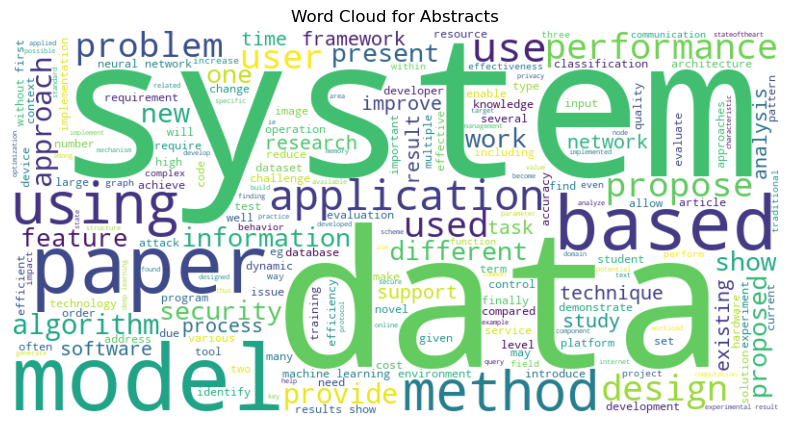

In [46]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(clean_abstracts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Abstracts')
plt.show()

In [30]:
in_category_df = combined_df[combined_df['in_specific_category']]

In [49]:
category_abstracts = ' '.join(in_category_df['abstract'])
clean_category_abstracts = clean_text(category_abstracts)

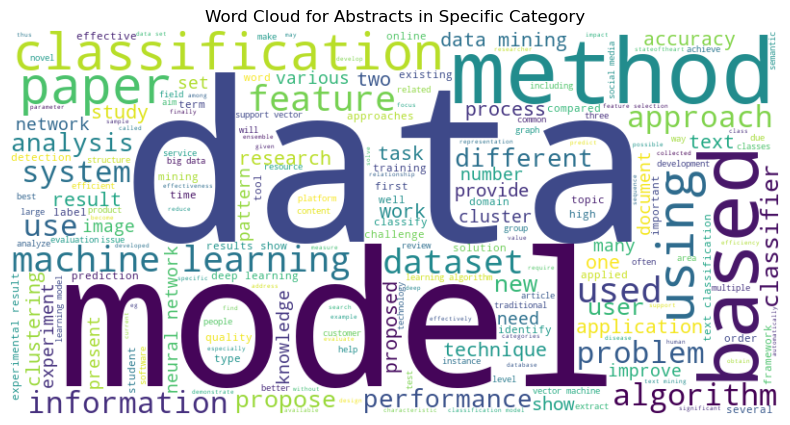

In [50]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(clean_category_abstracts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Abstracts in Specific Category')
plt.show()

In [33]:
not_in_category_df = combined_df[~combined_df['in_specific_category']]

In [51]:
no_category_abstracts = ' '.join(not_in_category_df['abstract'])
clean_no_category_abstracts = clean_text(no_category_abstracts)

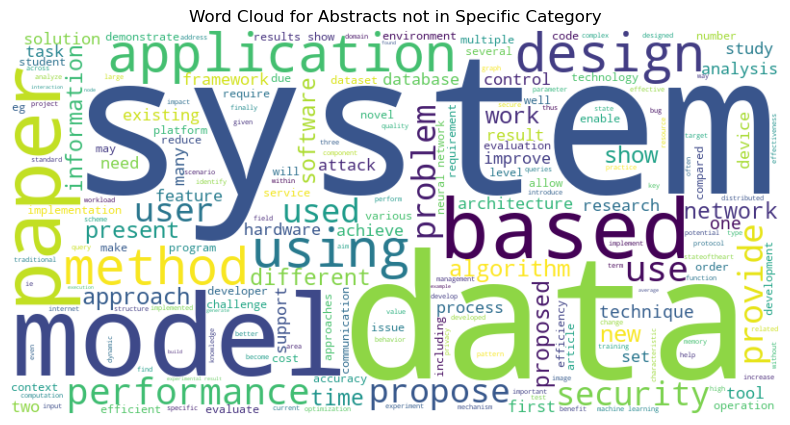

In [52]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(clean_no_category_abstracts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Abstracts not in Specific Category')
plt.show()

In [53]:
in_category_df.shape[0], not_in_category_df.shape[0]

(977, 4987)

In [54]:
abstracts = combined_df['abstract']

In [55]:
category_labels = combined_df['in_specific_category']

In [56]:
vectorizer = TfidfVectorizer(max_features=100)
tfidf_matrix = vectorizer.fit_transform(abstracts)

In [60]:
arr_tfidf_matrix = tfidf_matrix.toarray()

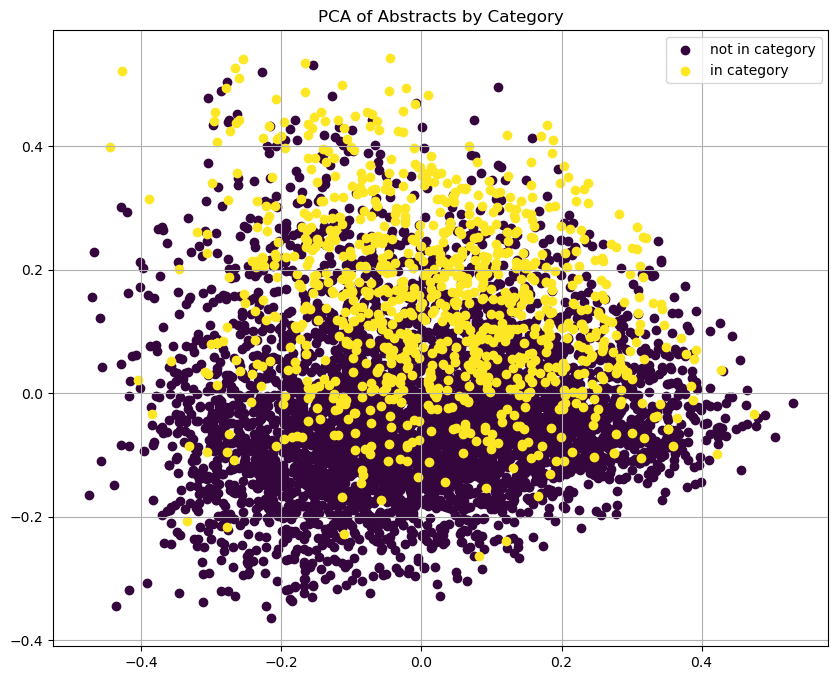

In [76]:
pca_2d = PCA(n_components=2)
principal_components = pca_2d.fit_transform(arr_tfidf_matrix)

plt.figure(figsize=(10, 8))
for label, color in zip([False, True], ['xkcd:dark purple', '#fde725']):
    mask = category_labels == label
    plt.scatter(principal_components[mask, 0], principal_components[mask, 1], 
                color=color, label='in category' if label else 'not in category')

plt.title('PCA of Abstracts by Category')
plt.legend()
plt.grid(True)
plt.show()

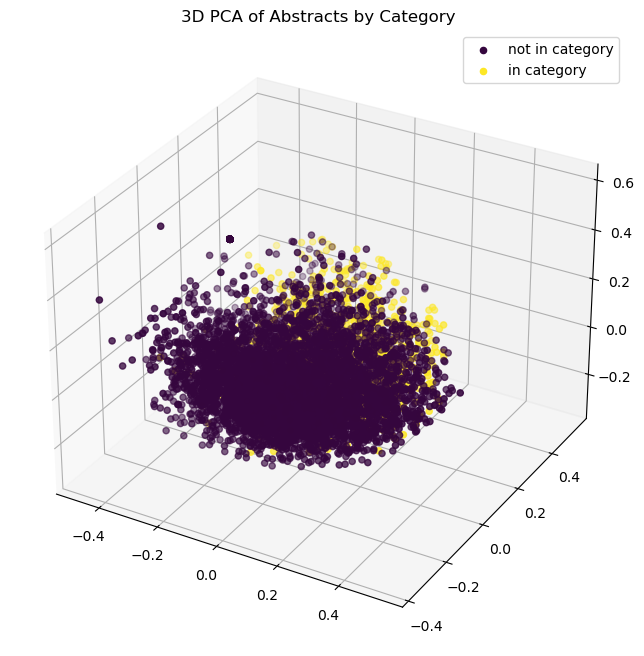

In [75]:
pca_3d = PCA(n_components=3)
principal_components_3d = pca_3d.fit_transform(arr_tfidf_matrix)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for label, color in zip([False, True], ['xkcd:dark purple', '#fde725']):
    mask = category_labels == label
    ax.scatter(principal_components_3d[mask, 0], principal_components_3d[mask, 1], principal_components_3d[mask, 2], 
               color=color, label='in category' if label else 'not in category')

ax.set_title('3D PCA of Abstracts by Category')
ax.legend()
plt.show()

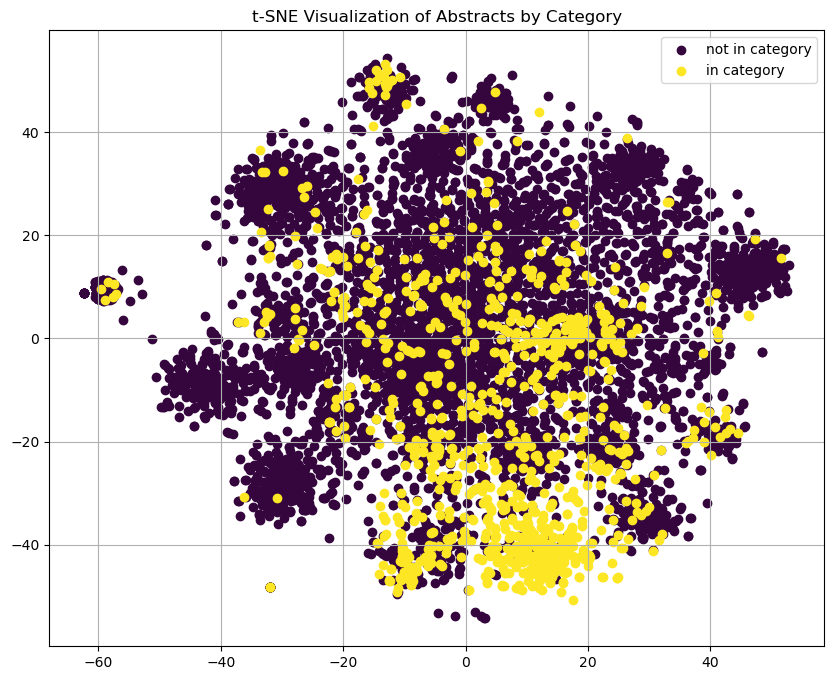

In [74]:
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(arr_tfidf_matrix)

plt.figure(figsize=(10, 8))
for label, color in zip([False, True], ['xkcd:dark purple', '#fde725']):
    mask = category_labels == label
    plt.scatter(tsne_results[mask, 0], tsne_results[mask, 1], 
                color=color, label='in category' if label else 'not in category')

plt.title('t-SNE Visualization of Abstracts by Category')
plt.legend()
plt.grid(True)
plt.show()

In [64]:
kmeans = KMeans(n_clusters=2)

In [65]:
kmeans.fit(arr_tfidf_matrix)

C:\Users\linag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [67]:
kmean_labels = kmeans.predict(arr_tfidf_matrix)

In [69]:
pca2_df = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])
pca2_df['cluster'] = kmean_labels

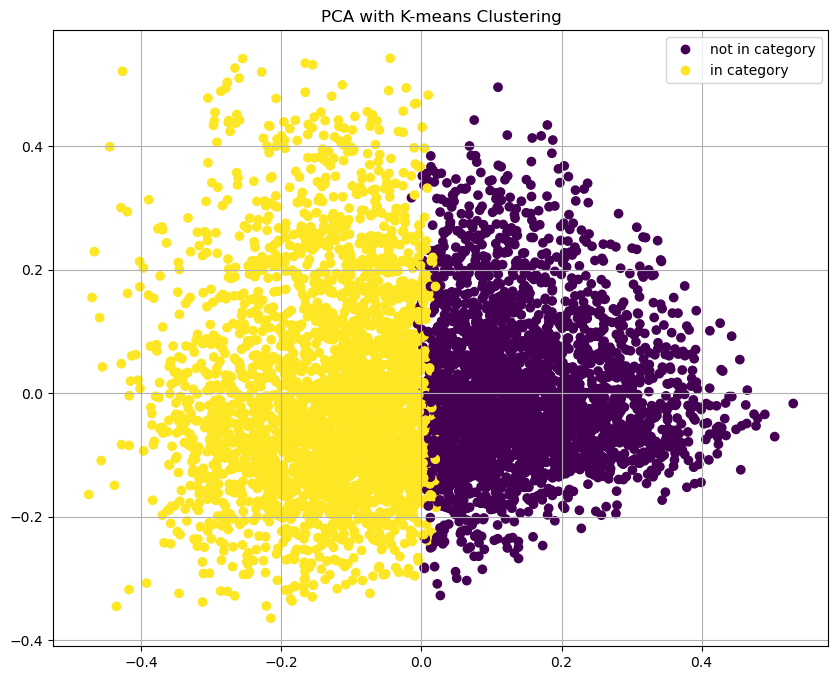

In [83]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca2_df['PCA1'], pca2_df['PCA2'], c=pca2_df['cluster'], cmap='viridis')
plt.title('PCA with K-means Clustering')
plt.legend(handles=scatter.legend_elements()[0], labels=['not in category', 'in category'])
plt.grid(True)
plt.show()